## Setup

In [7]:
!pip list

Package                   Version
------------------------- --------------
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     23.2.0
autopep8                  2.1.1
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
cachetools                5.3.3
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
cleanvision               0.3.6
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.2
cycler                    0.12.1
db-dtypes                 1.2.0
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
distlib                   0.3.8
executing                 2.2.0
fastjsonschema            2.21.1
filelock                  3.14.0
filetype        

In [8]:
!nvidia-smi

Fri Jul 25 22:29:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.80                 Driver Version: 576.80         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8              2W /   94W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2025 NVIDIA Corporation
Built on Tue_May_27_02:24:01_Pacific_Daylight_Time_2025
Cuda compilation tools, release 12.9, V12.9.86
Build cuda_12.9.r12.9/compiler.36037853_0


In [ ]:
!pip uninstall torch

In [2]:
# run if first time
!pip install python-dotenv roboflow ipywidgets scikit-image scikit-image cleanvision
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.7.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
Using cached torch-2.7.1-cp312-cp312-win_amd64.whl (216.1 MB)


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu128
  Using cached https://download.pytorch.org/whl/cu128/torchaudio-2.7.1%2Bcu128-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
Using cached https://download.pytorch.org/whl/cu128/torchaudio-2.7.1%2Bcu128-cp312-cp312-win_amd64.whl (4.7 MB)


In [33]:
# Import all important libraries
import os
import cv2
import torch
import torchvision
from collections import Counter
from dotenv import load_dotenv
from roboflow import Roboflow
from skimage.io import imread
from cleanvision import Imagelab
import matplotlib.pyplot as plt

In [2]:
ROOT_DIR = os.getcwd() 

In [3]:
print("CUDA Available: ", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)
print("GPU Name:", torch.cuda.get_device_name(0))

CUDA Available:  True
CUDA Version: 12.8
PyTorch Version: 2.7.1+cu128
Torchvision Version: 0.22.1+cu128
GPU Name: NVIDIA GeForce RTX 4070 Laptop GPU


In [4]:
# Load environment variables
load_dotenv()
api_key = os.getenv("API_KEY")

In [5]:
# Initialize Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("tugas-akhir-icad").project("proyek-akhir-icad")
version = project.version(12)

# Define expected folder name based on format used by Roboflow
dataset_folder = "proyek-akhir-icad-12"

# Check if folder already exists
if not os.path.exists(dataset_folder):
    dataset = version.download("yolov12")
    print(f"Dataset downloaded to: {dataset.location}")
else:
    print(f"Dataset already exists at: {dataset_folder}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to proyek-akhir-icad-12 in yolov12:: 100%|████████| 4022/4022 [00:02<00:00, 1699.89it/s]

Dataset downloaded to: C:\Users\Enzo\Desktop\mcs663\hw5\proyek-akhir-icad-12


In [117]:
DATASET_DIR = 'proyek-akhir-icad-12/'
IMAGES_DIR = os.path.join(DATASET_DIR, "train", "images")
TEST_IMAGES_DIR = os.path.join(DATASET_DIR, "test", "images")
VALID_IMAGES_DIR = os.path.join(DATASET_DIR, "valid", "images")
IMPROVED_IMAGES_DIR = os.path.join(DATASET_DIR, "train", "images_improved")
os.makedirs(IMPROVED_IMAGES_DIR, exist_ok=True)

print(IMAGES_DIR)

proyek-akhir-icad-12/train\images


Reading images from C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/1404 [00:00<?, ?it/s]

  0%|          | 0/1404 [00:00<?, ?it/s]

Issue checks completed. 59 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | near_duplicates  |           59 |
|  1 | dark             |            0 |
|  2 | light            |            0 |
|  3 | odd_aspect_ratio |            0 |
|  4 | low_information  |            0 |
|  5 | blurry           |            0 |
|  6 | grayscale        |            0 |
|  7 | odd_size         |            0 |
|  8 | exact_duplicates |            0 | 

------------------ near_duplicates images ------------------

Number of examples with this issue: 59
Examples representing most severe instances of this issue:

Set: 0


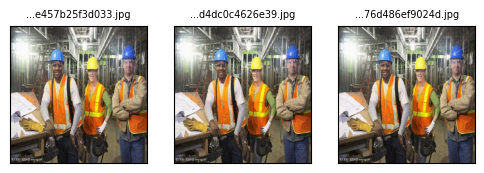

Set: 1


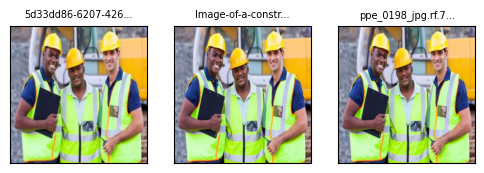

Set: 2


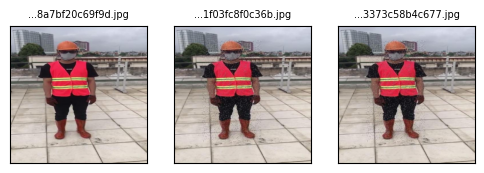

Set: 3


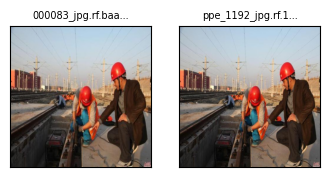

In [25]:
imagelab = Imagelab(data_path=IMAGES_DIR)
imagelab.find_issues()
imagelab.report()

In [14]:
imagelab.issues

,odd_size_score,is_odd_size_issue,odd_aspect_ratio_score,is_odd_aspect_ratio_issue,low_information_score,is_low_information_issue,light_score,is_light_issue,grayscale_score,is_grayscale_issue,dark_score,is_dark_issue,blurry_score,is_blurry_issue,exact_duplicates_score,is_exact_duplicates_issue,near_duplicates_score,is_near_duplicates_issue
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/valid/images/-1016-_png_jpg.rf.1bdf7c1e56b7336a1ac589c749f13064.jpg,1.0,False,1.0,False,0.915130,False,0.817725,False,1,False,0.956204,False,0.539843,False,1.0,False,1.0,False
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/valid/images/-1051-_png_jpg.rf.e9dbffec8ed9684b382a6bf04f4277c3.jpg,1.0,False,1.0,False,0.922315,False,0.969223,False,1,False,1.000000,False,0.526713,False,1.0,False,1.0,False
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/valid/images/-1352-_png_jpg.rf.a318f5e786444ca0ef7c3872d7ad7512.jpg,1.0,False,1.0,False,0.925893,False,0.852075,False,1,False,0.901430,False,0.523817,False,1.0,False,1.0,False
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/valid/images/-2023-05-16-041423_jpg.rf.20549fe69088afa6e00393d41988a3ed.jpg,1.0,False,1.0,False,0.874602,False,0.919393,False,1,False,0.665393,False,0.411456,False,1.0,False,1.0,False
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/valid/images/-2023-05-16-041507_jpg.rf.1c25f5f6693e639c1424b24858a54d98.jpg,1.0,False,1.0,False,0.887328,False,0.804461,False,1,False,0.782051,False,0.469564,False,1.0,False,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/valid/images/videos-mp4-frame00133_0020_jpg.rf.f7c0e1ae21b25bc5e494b702b118682d.jpg,1.0,False,1.0,False,0.854450,False,0.938041,False,1,False,0.585370,False,0.547136,False,1.0,False,1.0,False
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/valid/images/videos-mp4-frame00189_0028_jpg.rf.11de28fbd4ebc9fd8041438ce0e392b9.jpg,1.0,False,1.0,False,0.861806,False,0.945551,False,1,False,0.604279,False,0.369694,False,1.0,False,1.0,False
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/valid/images/videos-mp4-frame00280_0041_jpg.rf.4334266f7821b69c72824145b66c9c24.jpg,1.0,False,1.0,False,0.818569,False,0.865203,False,1,False,0.521468,False,0.516462,False,1.0,False,1.0,False
C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/valid/images/wd_png.rf.8ad5213ebe36a512a75e979dae1ae343.jpg,1.0,False,1.0,False,0.873252,False,0.809195,False,1,False,0.977442,False,0.913496,False,1.0,False,1.0,False


In [15]:
type(imagelab.issues)

pandas.core.frame.DataFrame

In [28]:
score_names = ['odd_size_score', 'odd_aspect_ratio_score', 'low_information_score', 'light_score', 'grayscale_score', 'dark_score', 'blurry_score',
               'exact_duplicates_score', 'near_duplicates_score']
for score_name in imagelab.issues:
    min_value = imagelab.issues[score_name].min()
    max_value = imagelab.issues[score_name].max()
    print(f'{score_name} min: {min_value} | max: {max_value}')

odd_size_score min: 1.0 | max: 1.0
is_odd_size_issue min: False | max: False
odd_aspect_ratio_score min: 1.0 | max: 1.0
is_odd_aspect_ratio_issue min: False | max: False
low_information_score min: 0.40370499905479584 | max: 0.9535980158103406
is_low_information_issue min: False | max: False
light_score min: 0.4063125352141026 | max: 1.0
is_light_issue min: False | max: False
grayscale_score min: 1 | max: 1
is_grayscale_issue min: False | max: False
dark_score min: 0.6144843430793212 | max: 1.0
is_dark_issue min: False | max: False
blurry_score min: 0.35958937372393895 | max: 1.0
is_blurry_issue min: False | max: False
exact_duplicates_score min: 1.0 | max: 1.0
is_exact_duplicates_issue min: False | max: False
near_duplicates_score min: 0.3333333333333333 | max: 1.0
is_near_duplicates_issue min: False | max: True


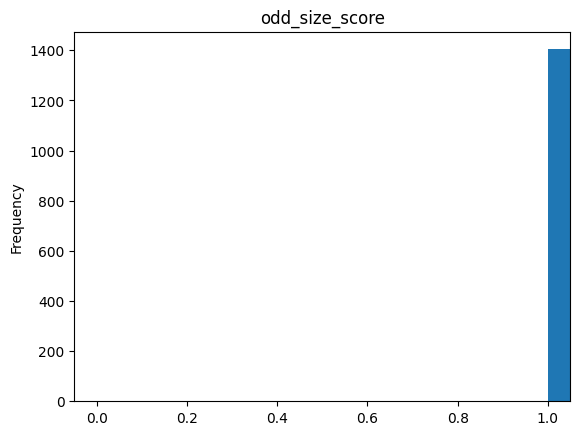

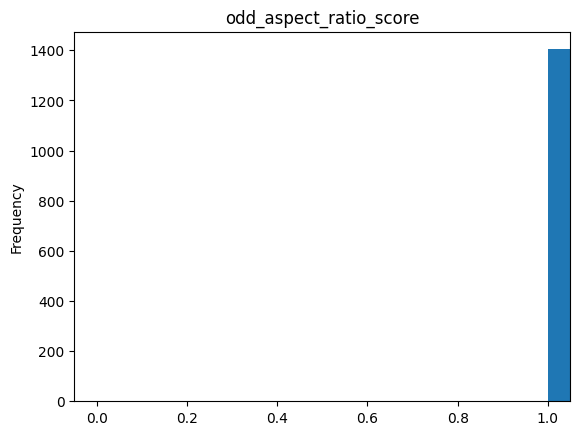

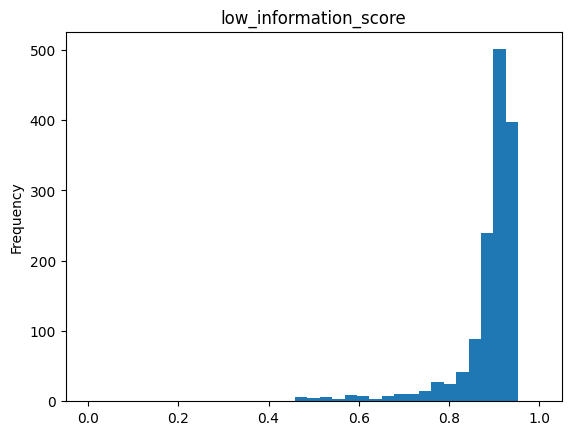

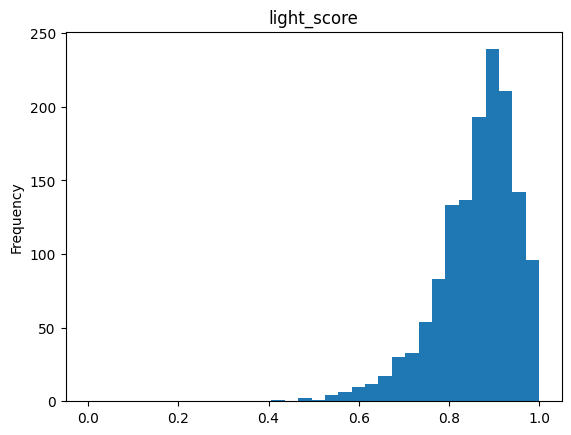

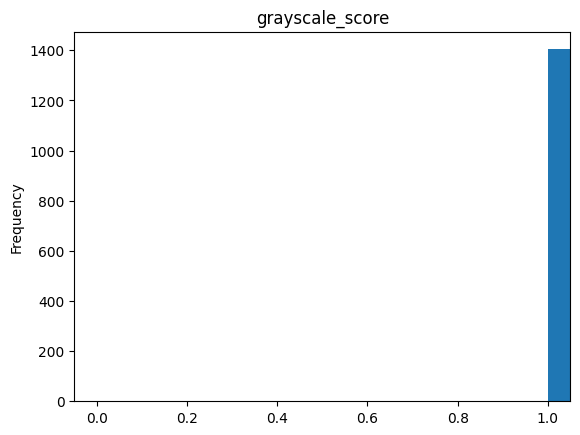

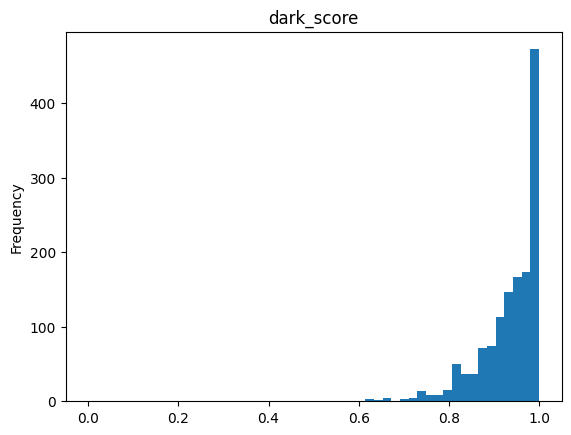

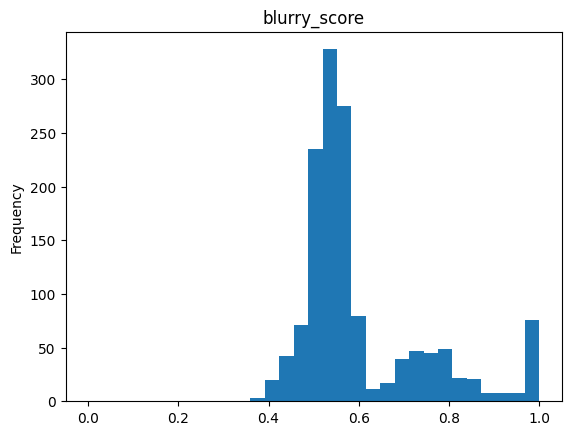

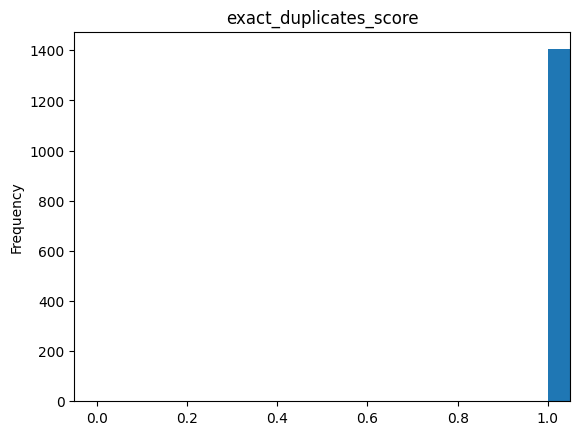

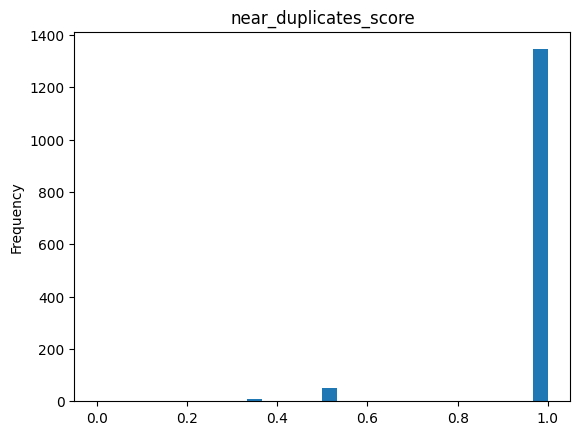

In [48]:
for score_name in score_names:
    #imagelab.issues[[score_name]].plot(kind='bar', figsize=(8, 5))
    imagelab.issues[score_name].plot.hist(bins=20)
    plt.title(score_name)
    plt.xlim(-0.05, 1.05)
    plt.show()

In [49]:
imagelab.list_default_issue_types()

['dark',
 'light',
 'odd_aspect_ratio',
 'low_information',
 'exact_duplicates',
 'near_duplicates',
 'blurry',
 'grayscale',
 'odd_size']

Reading images from C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, odd_size, grayscale images ...


  0%|          | 0/1404 [00:00<?, ?it/s]

  0%|          | 0/1404 [00:00<?, ?it/s]

Issue checks completed. 59 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | near_duplicates  |           59 |
|  1 | dark             |            0 |
|  2 | light            |            0 |
|  3 | odd_aspect_ratio |            0 |
|  4 | low_information  |            0 |
|  5 | blurry           |            0 |
|  6 | odd_size         |            0 |
|  7 | grayscale        |            0 |
|  8 | exact_duplicates |            0 | 

------------------ near_duplicates images ------------------

Number of examples with this issue: 59
Examples representing most severe instances of this issue:

Set: 0


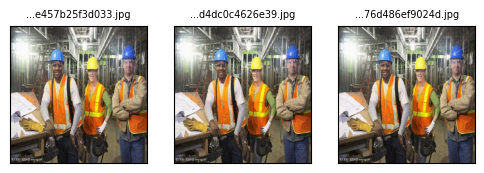

Set: 1


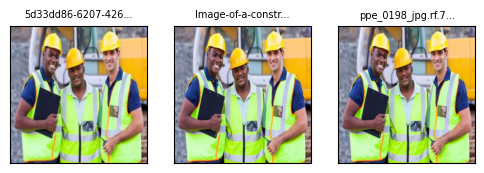

Set: 2


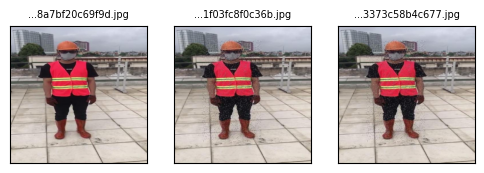

Set: 3


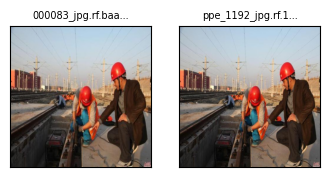

In [113]:
our_issue_types = {
    "dark": { "threshold": 0.4 },
    "light": { "threshold": 0.4 },
    "odd_aspect_ratio": { "threshold": 0.8 },
    "low_information": { "threshold": 0.4 },
    "exact_duplicates": { "threshold": 0.4 },
    "near_duplicates": { "threshold": 0.8 },
    "blurry": { "threshold": 0.3 },
    "odd_size": { "threshold": 0.8 },
    "grayscale": { "threshold": 0.8 }
}
imagelab = Imagelab(data_path=IMAGES_DIR)
imagelab.find_issues(our_issue_types)
imagelab.report()

In [115]:
# reference: https://github.com/cleanlab/cleanvision/discussions/245#discussioncomment-7976383
from itertools import chain

# Group near duplicates into sets
near_duplicates_image_sets = imagelab.info['near_duplicates']['sets']

# Get blurry score of each near duplicate image
near_duplicates_image_scores = (imagelab.issues[imagelab.issues["is_near_duplicates_issue"] == True]
                                    .sort_values(by='blurry_score')
                                    .reset_index()[['index', 'blurry_score']]
                                    .values.tolist())

near_duplicates_images = []

# Create a new set list by comparing
# near_duplicates_image_sets and near_duplicates_image_scores
# and removing the image with the highest blurr score (less blurry, highest quality?)
# from each set
for set in near_duplicates_image_sets:
    max_score_entry = max((entry for entry in near_duplicates_image_scores if entry[0] in set), key=lambda x: x[1])
    updated_set_list = [img for img in set if img != max_score_entry[0]]
    near_duplicates_images.append(updated_set_list)

# Flatten the set list 
# e.g. convert list of lists into one big list
# so it is easily iterable
near_duplicates_images = list(chain.from_iterable(near_duplicates_images))

In [116]:
near_duplicates_images

['C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images/000083_jpg.rf.baaee9c123aadb5ad0a2631f2f665bf2.jpg',
 'C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images/hard_hat_workers4970_png.rf.a36ae3f775a8e3f82736f718189770de.jpg',
 'C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images/hard_hat_workers677_png.rf.2be5d34ec1093531a12e769584529f8e.jpg',
 'C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images/000302_jpg.rf.286864a3ffbf6c2912da85e0c288898c.jpg',
 'C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images/ppe_0945_jpg.rf.e5d639cc8fbb831a2972e5f869b18d63.jpg',
 'C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images/01261_jpg.rf.9b2bac52f052c6cc8b8d4dc0c4626e39.jpg',
 'C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images/ppe_0864_jpg.rf.a523156131c38f0c42476d486ef9024d.jpg',
 'C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images/01437_jpg.rf.6abd23455afb7128732e19a014541b4e.j

In [122]:
import shutil, os
all_images = imagelab.issues.index.to_list()
for f in all_images:
    if f not in near_duplicates_images:
        shutil.copy(f, IMPROVED_IMAGES_DIR)

In [123]:
imagelab = Imagelab(data_path=IMPROVED_IMAGES_DIR)
imagelab.find_issues(our_issue_types)
imagelab.report()

Reading images from C:/Users/Enzo/Desktop/mcs663/hw5/proyek-akhir-icad-12/train/images_improved
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, odd_size, grayscale images ...


  0%|          | 0/1373 [00:00<?, ?it/s]

  0%|          | 0/1373 [00:00<?, ?it/s]

Issue checks completed. 0 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | dark             |            0 |
|  1 | light            |            0 |
|  2 | odd_aspect_ratio |            0 |
|  3 | low_information  |            0 |
|  4 | blurry           |            0 |
|  5 | odd_size         |            0 |
|  6 | grayscale        |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 

